<a href="https://colab.research.google.com/github/nikita1128/Appliances-Energy-Prediction/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement:**

###**Data-driven prediction of energy use of appliances**

###**The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes(parameters).**###

###**date time year-month-day hour:minute:second**###

###**Appliances, energy use in Wh (Dependent variable)**###

###**lights, energy use of light fixtures in the house in Wh (Drop this column)**###

###**T1, Temperature in kitchen area, in Celsius**###

###**RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius RH2, Humidity in living room area, in %**###

###**T3, Temperature in laundry room area**###

###**RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius RH4, Humidity in office room, in %**###

###**T5, Temperature in bathroom, in Celsius**### 

###**RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius RH6, Humidity outside the building (north side), in %**###

###**T7, Temperature in ironing room , in Celsius**###

###**RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius RH8, Humidity in teenager room 2, in %**###

###**T9, Temperature in parents room, in Celsius**### 

###**RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in Celsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from Chievres weather station), in %**###

###**Wind speed (from Chievres weather station), in m/s**###

###**Visibility (from Chievres weather station), in km**###

###**Tdewpoint (from Chievres weather station), Â°C**###

###**rv1, Random variable 1, nondimensional**###

###**rv2, Random variable 2, nondimensional**###



###**Where indicated, hourly data (then interpolated) from the nearest airport weather station(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.**###

# **Importing the required libraries**

In [ ]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime, date

from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
 
import time
from math import sqrt

import warnings
warnings.filterwarnings("ignore")


# **Loading the data file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the data file using read_csv()
appliance_energy_data = pd.read_csv('/content/drive/MyDrive/Alma/Pro/Capstone Project/Copy of data_application_energy.csv', parse_dates = ['date'])


# **Exploratory Data Analysis**

In [ ]:
#To see all columns 
pd.set_option('display.max_columns', None)

In [ ]:
#checking first five rows and all columns of dataset
appliance_energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
#checking last five rows and all columns of dataset
appliance_energy_data.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [ ]:
#shape of the dataframne
appliance_energy_data.shape

(19735, 29)

In [ ]:
#Printing number of rows and coloumns present in dataframe
print ("Rows    : " ,appliance_energy_data.shape[0])
print ("Columns : " ,appliance_energy_data.shape[1])

Rows    :  19735
Columns :  29


In [ ]:
#columns of the dataframe
appliance_energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
#Printing the list of columns(features) in dataframe
print("Features: \n" ,appliance_energy_data.columns.tolist())

Features: 
 ['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [ ]:
#getting information about the DataFrame using info() method
appliance_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

#**Checking for null values.**

In [ ]:
#checking null values
appliance_energy_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
#Printing number of null(missing) values
print("Missing values :  ", appliance_energy_data.isnull().sum().values.sum())

Missing values :   0


####From above we can see that there is no null/missing value in our dataframe.

#**Variable Breakdown**

1. **date** : time year-month-day hour:minute:second

2. **Appliances** : Total energy used by appliances, in Wh

3. **lights** : energy use of light fixtures in the house in Wh

4. **T1** : Temperature in kitchen area, in Celsius

5. **RH_1** : Humidity in kitchen area, in %

6. **T2** : Temperature in living room area, in Celsius 

7. **RH_2** : Humidity in living room area, in % 

8. **T3** : Temperature in laundry room area 

9. **RH_3** : Humidity in laundry room area, in % 

10. **T4** : Temperature in office room, in Celsius 

11. **RH_4** : Humidity in office room, in % 

12. **T5** : Temperature in bathroom, in Celsius 

13. **RH_5** : Humidity in bathroom, in % 

14. **T6** : Temperature outside the building (north side), in Celsius 

15. **RH_6** : Humidity outside the building (north side), in %

16. **T7** : Temperature in ironing room, in Celsius 

17. **RH_7** : Humidity in ironing room, in %

18. **T8** : Temperature in teenager room 2, in Celsius

19. **RH_8** : Humidity in teenager room 2, in %

20. **T9** : Temperature in parents’ room, in Celsius

21. **RH_9** : Humidity in parents’ room, in %

22. **T_out** : Temperature outside (from Chievres weather station), in Celsius

23. **Pressure** : (from Chievres weather station), in mm Hg 

24. **RH_out** :Humidity outside (from Chievres weather station), in %

25. **Wind speed**: (from Chievres weather station), in m/s

26. **Visibility** :(from Chievres weather station), in km

27. **Tdewpoint** : (from Chievres weather station), Â°C

28. **Rv1** :Random variable 1, non-dimensional

29. **Rv2** :Random variable 2, non-dimensional



#**Descriptive Statistics**

In [ ]:
#Using describe() function to generate descriptive statistics of the data
appliance_energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Inference:

1. The dataset consist of 28 independent variables (i.e. 11 temperature, 10 humidity, 1 pressure,1 wind speed, 1 visibility, 1 light, 1 date and 2 randoms) and 1 dependent variable (i.e. appliances).

1. Temperature ranges from -6°C to 30°C, where temperature inside the house varies between 14.89°C & 29.85°C, temperature outside (T6) varies between -6.06°C to 28.29°C.

2. Humidity ranges from 1% to 100%, where humidity inside house varies between 20.46% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

3. Wind speed ranges from 0 to 14 m/s.

4. Visibility ranges from 1 to 66 km.

5. Pressure ranges from 729 to 772 mm Hg.

6. Appliance energy usage ranges from 10 to 1080 Wh where 75% of appliance consumption is less than 100 Wh. With the maximum consumption of 1080 Wh, there will be outliers in this column and there are small number of cases where consumption is very high.

####Removing light column as we are not focusing on appliance specific reading.

In [ ]:
#Making copy of original dataframe to do further analysis
appliance_data = appliance_energy_data.copy()

#Dropping lights column
appliance_data = appliance_data.drop('lights',axis=1) 
appliance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   T1           19735 non-null  float64       
 3   RH_1         19735 non-null  float64       
 4   T2           19735 non-null  float64       
 5   RH_2         19735 non-null  float64       
 6   T3           19735 non-null  float64       
 7   RH_3         19735 non-null  float64       
 8   T4           19735 non-null  float64       
 9   RH_4         19735 non-null  float64       
 10  T5           19735 non-null  float64       
 11  RH_5         19735 non-null  float64       
 12  T6           19735 non-null  float64       
 13  RH_6         19735 non-null  float64       
 14  T7           19735 non-null  float64       
 15  RH_7         19735 non-null  float64       
 16  T8  

# **Expanding and analysing 'date' column**

In [ ]:
#Creating a function to extract the features of time

def time_features_extractor(dataframe, attribute_list = ['year', 'month', 'day', 'hour', 'second', 'dayofweek']):
    ''' Takes dataframe with a column labeled 'date' and time attribute's list 
        as arguments to return dataframe with addition of new columns from time 
        attributes list.
    '''

    for attribute in attribute_list:
        dataframe[attribute] = dataframe['date'].apply(lambda x: getattr(x, attribute))
    return dataframe


In order to study our features further, we'll increase our resolution by expanding the 'date' column into 3 columns:


Day of week: Weekdays and weekends are likely to yield different energy consumption.

Month: Different months of the year are also likely to yield different energy consumption.

Hour: Lowest resolution for the exploration.


In [ ]:
#Creating dayofweek, month and hour column using function time_featues_extractor
appliance_data = time_features_extractor(appliance_data, ['dayofweek', 'month', 'hour'])
appliance_data.head()

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dayofweek,month,hour
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0,1,17
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,0,1,17
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,0,1,17
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,0,1,17
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,0,1,17


[]

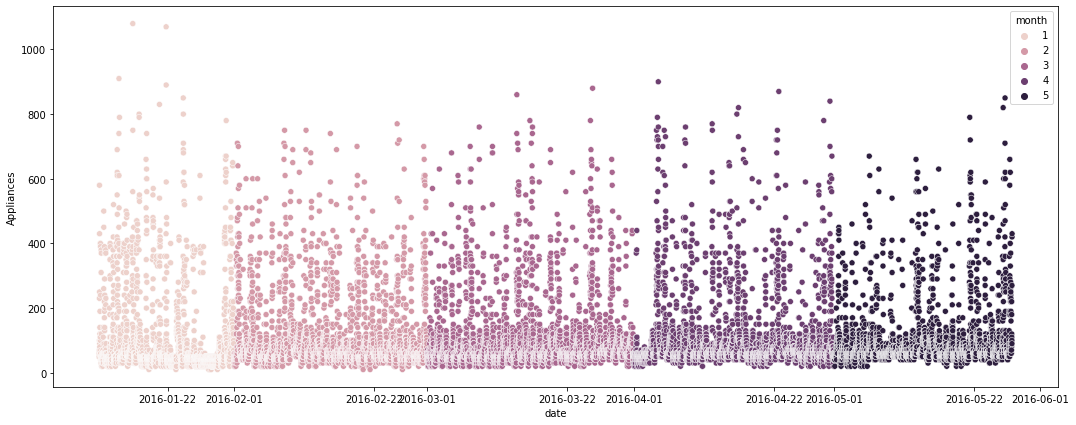

In [ ]:
#setting figure size
fig = plt.figure(figsize=(18,7))

#creating scatter plot
sns.scatterplot(x = "date", y = "Appliances", hue = "month", data = appliance_data)
plt.plot()

In [ ]:
#In order to transform the column 'dayofweek' to a binary column between weekdays(0) and weekends(1), we'll divide by 5 without residiual.

appliance_data['weekday'] = appliance_data['dayofweek'].apply(lambda x: x//5)
appliance_data['weekday'].value_counts()

0    14263
1     5472
Name: weekday, dtype: int64

[]

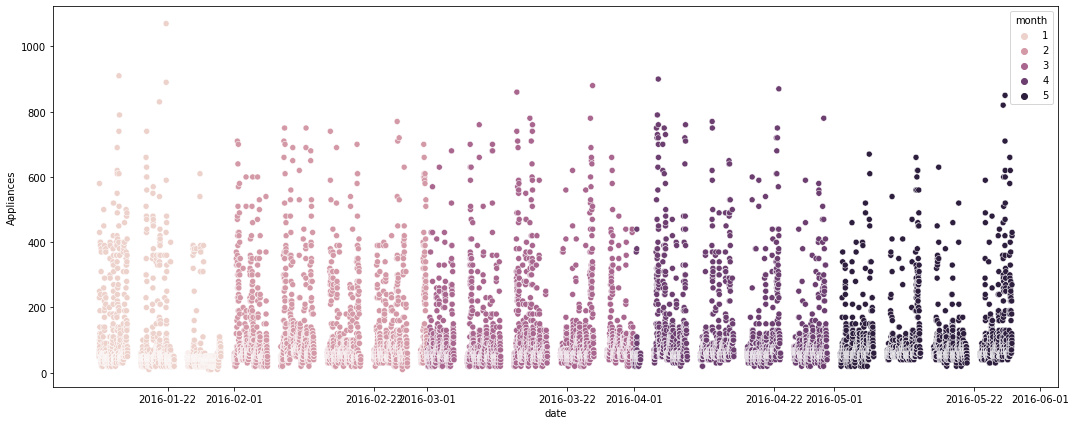

In [ ]:
#setting figure size
fig = plt.figure(figsize=(18,7))

#Find rows with weekday 
t_weekday =  appliance_data[appliance_data['weekday'] == 0]

#creating scatter plot
sns.scatterplot(x = t_weekday.date, y = t_weekday.Appliances, hue = "month", data = appliance_data)
plt.plot()

[]

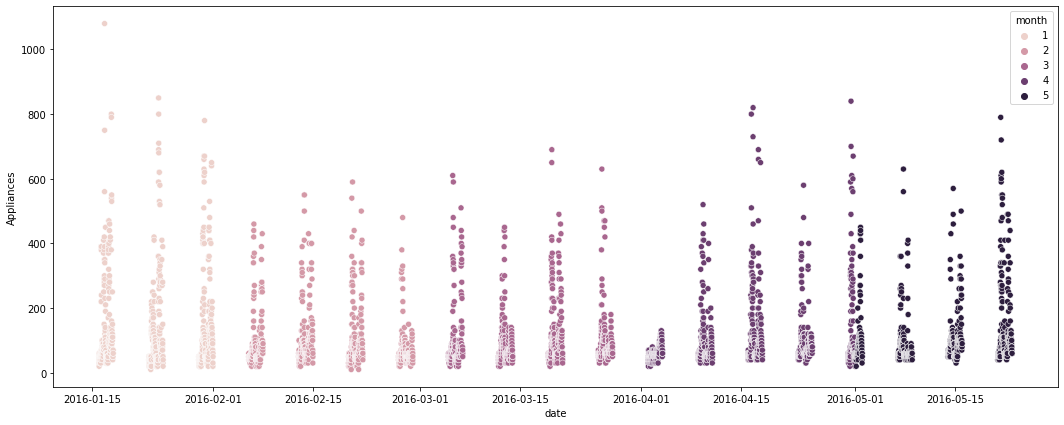

In [ ]:
#setting figure size
fig = plt.figure(figsize=(18,7))

#Find rows with weekend
t_weekend =  appliance_data[appliance_data['weekday'] == 1]

#creating scatter plot
sns.scatterplot(x = t_weekend.date, y = t_weekend.Appliances, hue = "month", data = appliance_data)
plt.plot()

Inference:
1. Scatter was used to track seasonality but we have only 4.5 months data so there were no traces of seasonality.

2. Scatter plot shows that there is no such coorelation between energy consumption on weekdays vs off days.

In [ ]:
#Functions to be used for the plots

#creating daily() funtion for 'dayofweek' column
def daily(x, df = appliance_data):
    ''' Takes the dataframe (appliance_data) with a column labeled 'dayofweek'and 
        a column (x) as arguments to return the mean of x.
    '''

    return df.groupby('dayofweek')[x].mean()


#creating hourly() funtion for 'hour' column
def hourly(x, df = appliance_data):
    ''' Takes the dataframe (appliance_data) with a column labeled 'hour' and 
        a column (x) as arguments to return the mean of x.
    '''

    return df.groupby('hour')[x].mean()


#creating monthly_daily() funtion to return a pivot table for 'dayofweek' & 'month' column
def monthly_daily(x, df = appliance_data):
    ''' Takes the dataframe (appliance_data) with two columns labeled as 'dayofweek'
        and 'month' and a column (x) to return a pivot table.
    '''

    by_day = df.pivot_table(index = 'dayofweek', columns = ['month'], 
                                       values = x, aggfunc = 'mean')
    return round(by_day, ndigits = 2)
    

#**Mean appliance energy consumption(Wh) per day of week**

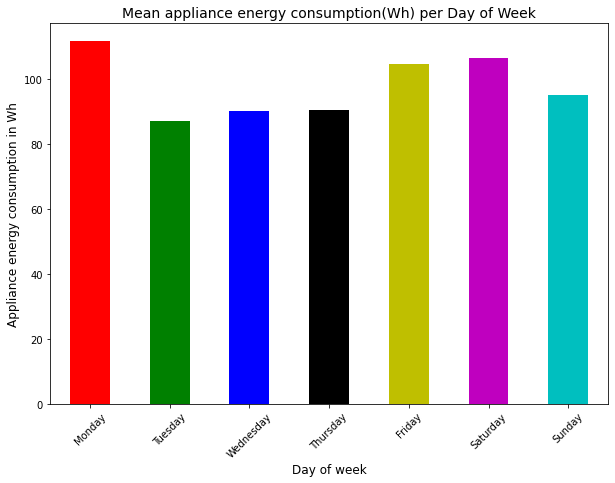

In [ ]:
#Bar chart for mean appliance energy consumption(Wh) per Day of Week
daily('Appliances').plot(kind = 'bar', figsize = (10,7), color = list('rgbkymc'))

#Creating ticks range and labels for the bar chart
ticks = list(range(0, 7)) 
labels = "Monday Tuesday Wednesday Thursday Friday Saturday Sunday".split()

#To display x label, y label and the title of the bar chart
plt.xlabel('Day of week', fontsize = 12)
plt.ylabel('Appliance energy consumption in Wh', fontsize = 12)
plt.title('Mean appliance energy consumption(Wh) per Day of Week', fontsize = 14)
plt.xticks(ticks, labels, rotation = '45')
plt.show()

Inference:

1. Maximum mean appliance energy consumption is on monday and minimum mean appliance energy consumption is on tuesday.

2. Mean appliance energy consumption is atleast 85 Wh(approx.) per day.

#**Mean appliance energy consumption(Wh) per hour of a day**

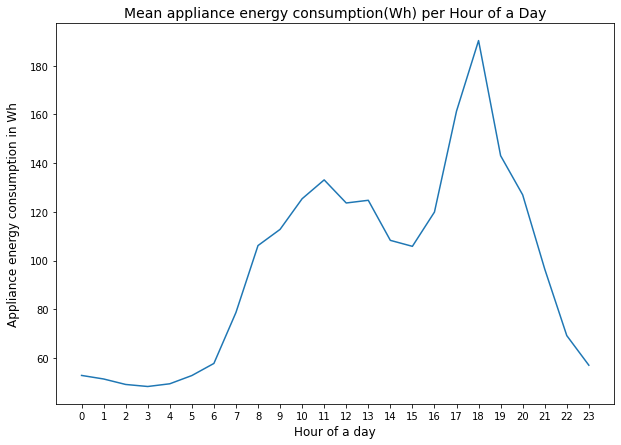

In [ ]:
#Line chart for mean appliance energy consumption(Wh) per Hour of a Day
hourly('Appliances').plot(figsize=(10,7))

#Creating ticks range and labels for the line chart
ticks = list(range(0, 24))

#To display x label, y label and the title of the line chart
plt.xlabel('Hour of a day', fontsize = 12)
plt.ylabel('Appliance energy consumption in Wh', fontsize = 12, labelpad = 10)
plt.title('Mean appliance energy consumption(Wh) per Hour of a Day', fontsize = 14)
plt.xticks(ticks)
plt.show()

Inference:

1. The mean energy consumption of appliances is increasing in the morning hours(i.e. from 3-11 hrs) after which there is a drop in energy consumption in the afternoon(i.e. 11-15 hrs), then again it rises in the evening hours(i.e. 15-18 hrs) and drops at night(i.e. 18-23 hrs).

2. Lowest mean energy consumption of appliances is at 3 a.m. and highest mean energy consumption of appliances is at 6 p.m. (i.e.18 hrs).

According to my hypothesis:
1. Between 9:00 a.m. to 1:00 p.m. the power load is between 120-135Wh and after which it reduces  to around 100Wh.

2. In the evening hours (i.e. from 4:30 p.m. to 6:00p.m.) the energy consumption ranges from 130-185Wh as family members are at home and many devices are on.

3. At night and early morning hours (i.e.from 10:00 p.m. to 7:00 a.m.) the power load is below 80Wh, meaning that most appliances are off or standby. 

#**Mean appliance energy consumption(Wh) per weekday/month**

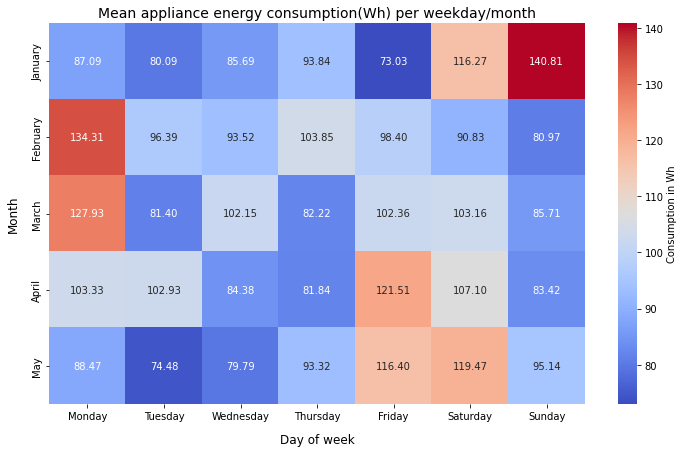

In [ ]:
#Heatmap for mean appliance energy consumption(Wh) per weekday/month

#setting figure size
plt.figure(figsize = (12,7))

#creating heatmap
ax = sns.heatmap(monthly_daily('Appliances').T, cmap = "coolwarm",
               xticklabels = "Monday Tuesday Wednesday Thursday Friday Saturday Sunday".split(),
               yticklabels = "January February March April May".split(),
               annot = True, fmt = '.2f',
               cbar_kws = {'label': 'Consumption in Wh'})

#To display x label, y label and the title of the heatmap
ax.set_xlabel("Day of week", labelpad = 12).set_fontsize('12')
ax.set_ylabel("Month", labelpad = 12).set_fontsize('12')
ax.set_title("Mean appliance energy consumption(Wh) per weekday/month").set_fontsize('14')
plt.show()

Inference:

1. We can see from the heatmap above that the highest and lowest mean appliance energy consumption is in the weekend(i.e. Sunday with approx. value of 141(Wh)) and weekday(i.e. Friday with approx. value of 73 (Wh))  of January.
2. Maximum mean appliance energy consumption is in the month of March and April with approx. value of 685(Wh).
3. More power is consumed on Monday ,Friday, Saturday and Sunday for each month which ranges between 486(Wh) to 541(Wh).

# **Analysis of target variable**

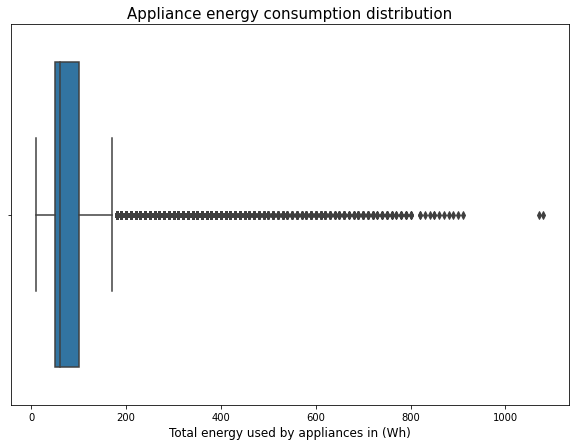

In [ ]:
#Boxplot for appliance energy consumption distribution

#setting figure size
plt.figure(figsize = (10,7))

#Creating boxplot
sns.boxplot(x = "Appliances", data = appliance_data)

#To display x label and the title of the boxplot
plt.xlabel('Total energy used by appliances in (Wh)', fontsize = 12)
plt.title("Appliance energy consumption distribution", fontsize = 15)
plt.show()

In [ ]:
#Dropping the outlier rows with Percentiles

upper_limit = appliance_data['Appliances'].quantile(.95)
lower_limit = appliance_data['Appliances'].quantile(.05)

#Setting the upper and lower limit for Appliances to select a particular section of the dataset
appliance_data = appliance_data[(appliance_data['Appliances'] < upper_limit) & (appliance_data['Appliances'] > lower_limit)]

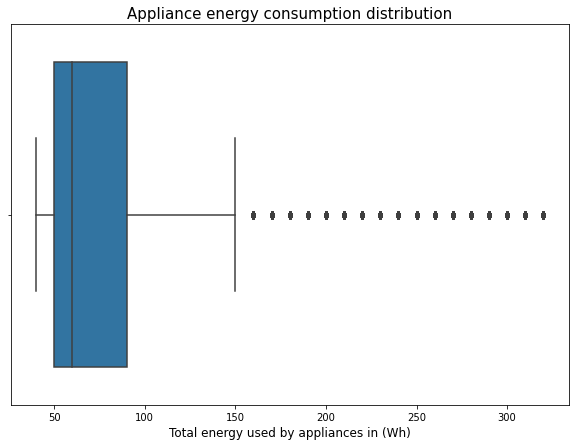

In [ ]:
#Boxplot for appliance energy consumption distribution after dropping the outlier rows with Percentiles

#setting figure size
plt.figure(figsize = (10,7))

#Creating boxplot
sns.boxplot(x = "Appliances", data = appliance_data)

#To display x label and the title of the boxplot
plt.xlabel('Total energy used by appliances in (Wh)', fontsize = 12)
plt.title("Appliance energy consumption distribution", fontsize = 15)
plt.show()

####Outliers have been reduced by dropping the outlier rows with percentiles.

The 'date' column is only used for understanding the energy consumption vs date time behaviour and we will not use this column for further analysis, thereby dropping the 'date' and all additional columns created from it (i.e., month, hour, and dayofweek) from the dataframe.

In [ ]:
#Removing date, month, weekday, hour, weekday and dayofweek column from the dataframe
appliance_data.drop(["date", "month", "hour", "weekday", "dayofweek"], axis=1, inplace = True)
appliance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17659 entries, 0 to 19732
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   17659 non-null  int64  
 1   T1           17659 non-null  float64
 2   RH_1         17659 non-null  float64
 3   T2           17659 non-null  float64
 4   RH_2         17659 non-null  float64
 5   T3           17659 non-null  float64
 6   RH_3         17659 non-null  float64
 7   T4           17659 non-null  float64
 8   RH_4         17659 non-null  float64
 9   T5           17659 non-null  float64
 10  RH_5         17659 non-null  float64
 11  T6           17659 non-null  float64
 12  RH_6         17659 non-null  float64
 13  T7           17659 non-null  float64
 14  RH_7         17659 non-null  float64
 15  T8           17659 non-null  float64
 16  RH_8         17659 non-null  float64
 17  T9           17659 non-null  float64
 18  RH_9         17659 non-null  float64
 19  T_ou

#**Checking frequency distribution of all data**

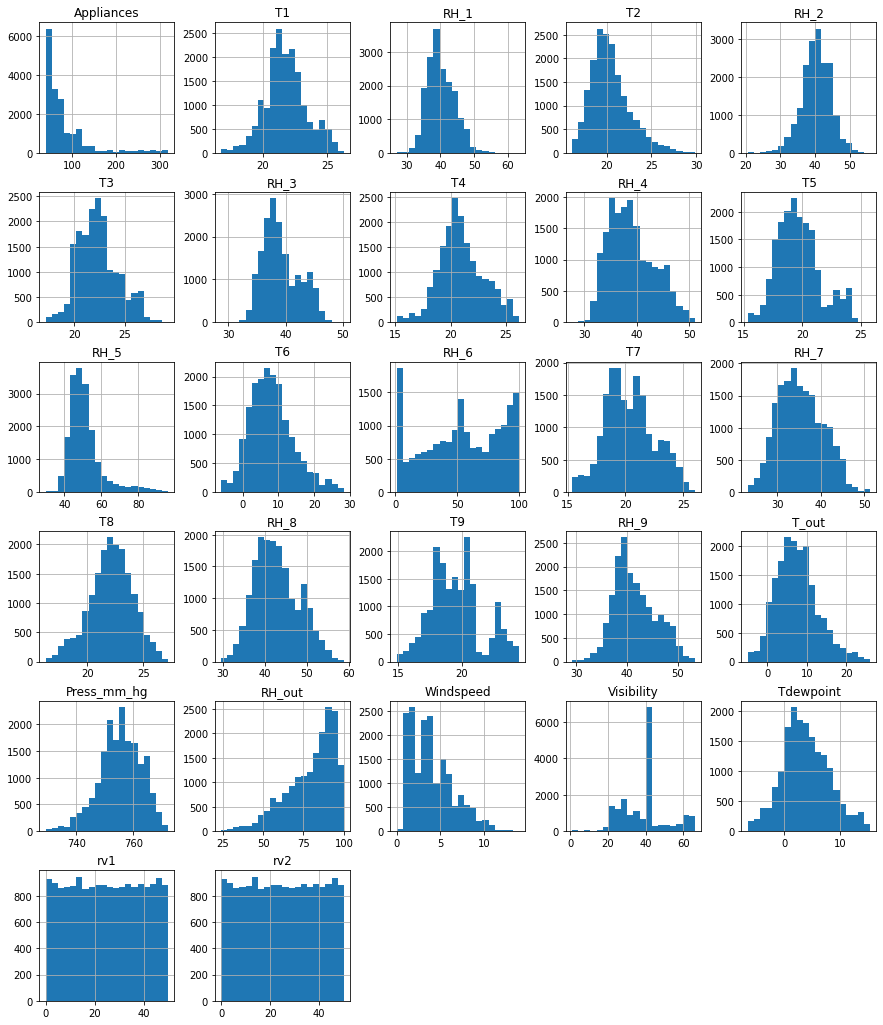

In [ ]:
#Plotting histogram for all the features to understand their distribution
appliance_data.hist(bins = 20 , figsize = (15,18))
plt.show()

Inference:
1. Almost all temperature variable follows "Normal Distribution" except for T9.

2. Similarly, all humidity variable follows "Normal Distribution" except RH_Out and RH_6.

3. The random variables rv1 and rv2 have more or less the same values for all the recordings.

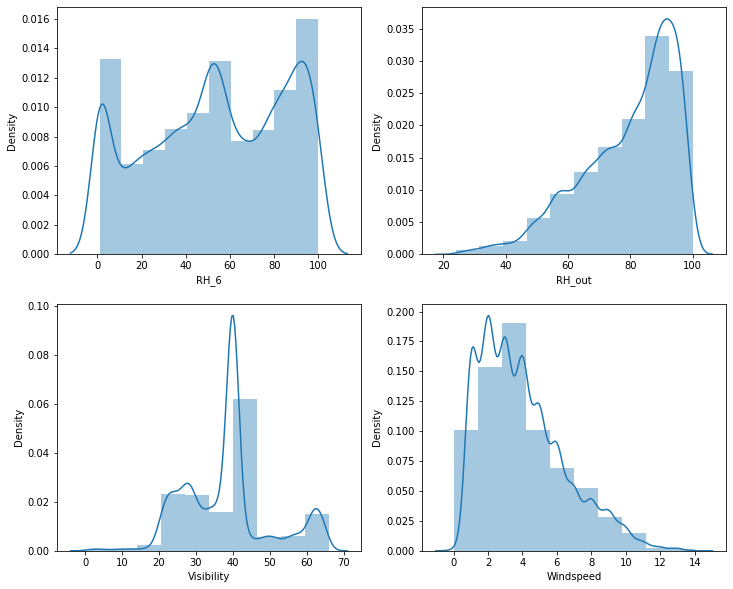

In [ ]:
#Plotting the distplot of independent variables(RH_6, RH_out, Visibility and Windspeed columns) to visualize their distribution better
f, ax = plt.subplots(2, 2, figsize = (12, 10))
vis1 = sns.distplot(appliance_data['RH_6'], bins = 10, ax = ax[0][0])
vis2 = sns.distplot(appliance_data['RH_out'], bins = 10, ax = ax[0][1])
vis3 = sns.distplot(appliance_data['Visibility'], bins = 10, ax = ax[1][0])
vis4 = sns.distplot(appliance_data['Windspeed'], bins = 10, ax = ax[1][1])

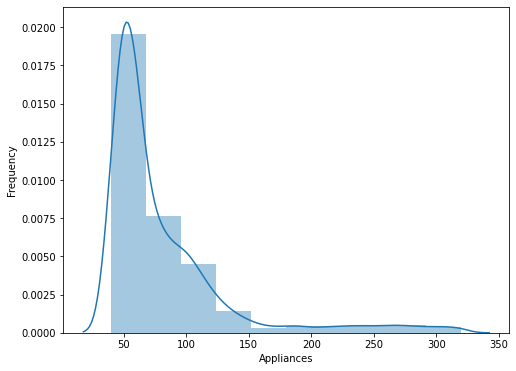

In [ ]:
#Plotting the distplot of dependent variable(Appliances column) to visualize its distribution better
f = plt.figure(figsize = (8,6))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(appliance_data["Appliances"], bins = 10)
plt.show()

Inference:
1. In independent variables, Windspeed column is positively skewed & RH_out is negatively skewed.
2. RH_6 and Visibility shows irregular distribution.

3. Dependent variable i.e. Appliance column is positively skewed.

According to my hypothesis:

1. The output variable appliances has most values less than 200Wh, showing that high energy consumption cases are very low.

2. The exceptional cases of normal distribution for humidity variables can be because they were placed outside the house indicating all the readings from sensors inside the home are from a normal distribution.

#**Drawing heat map to compare the correlation between features**

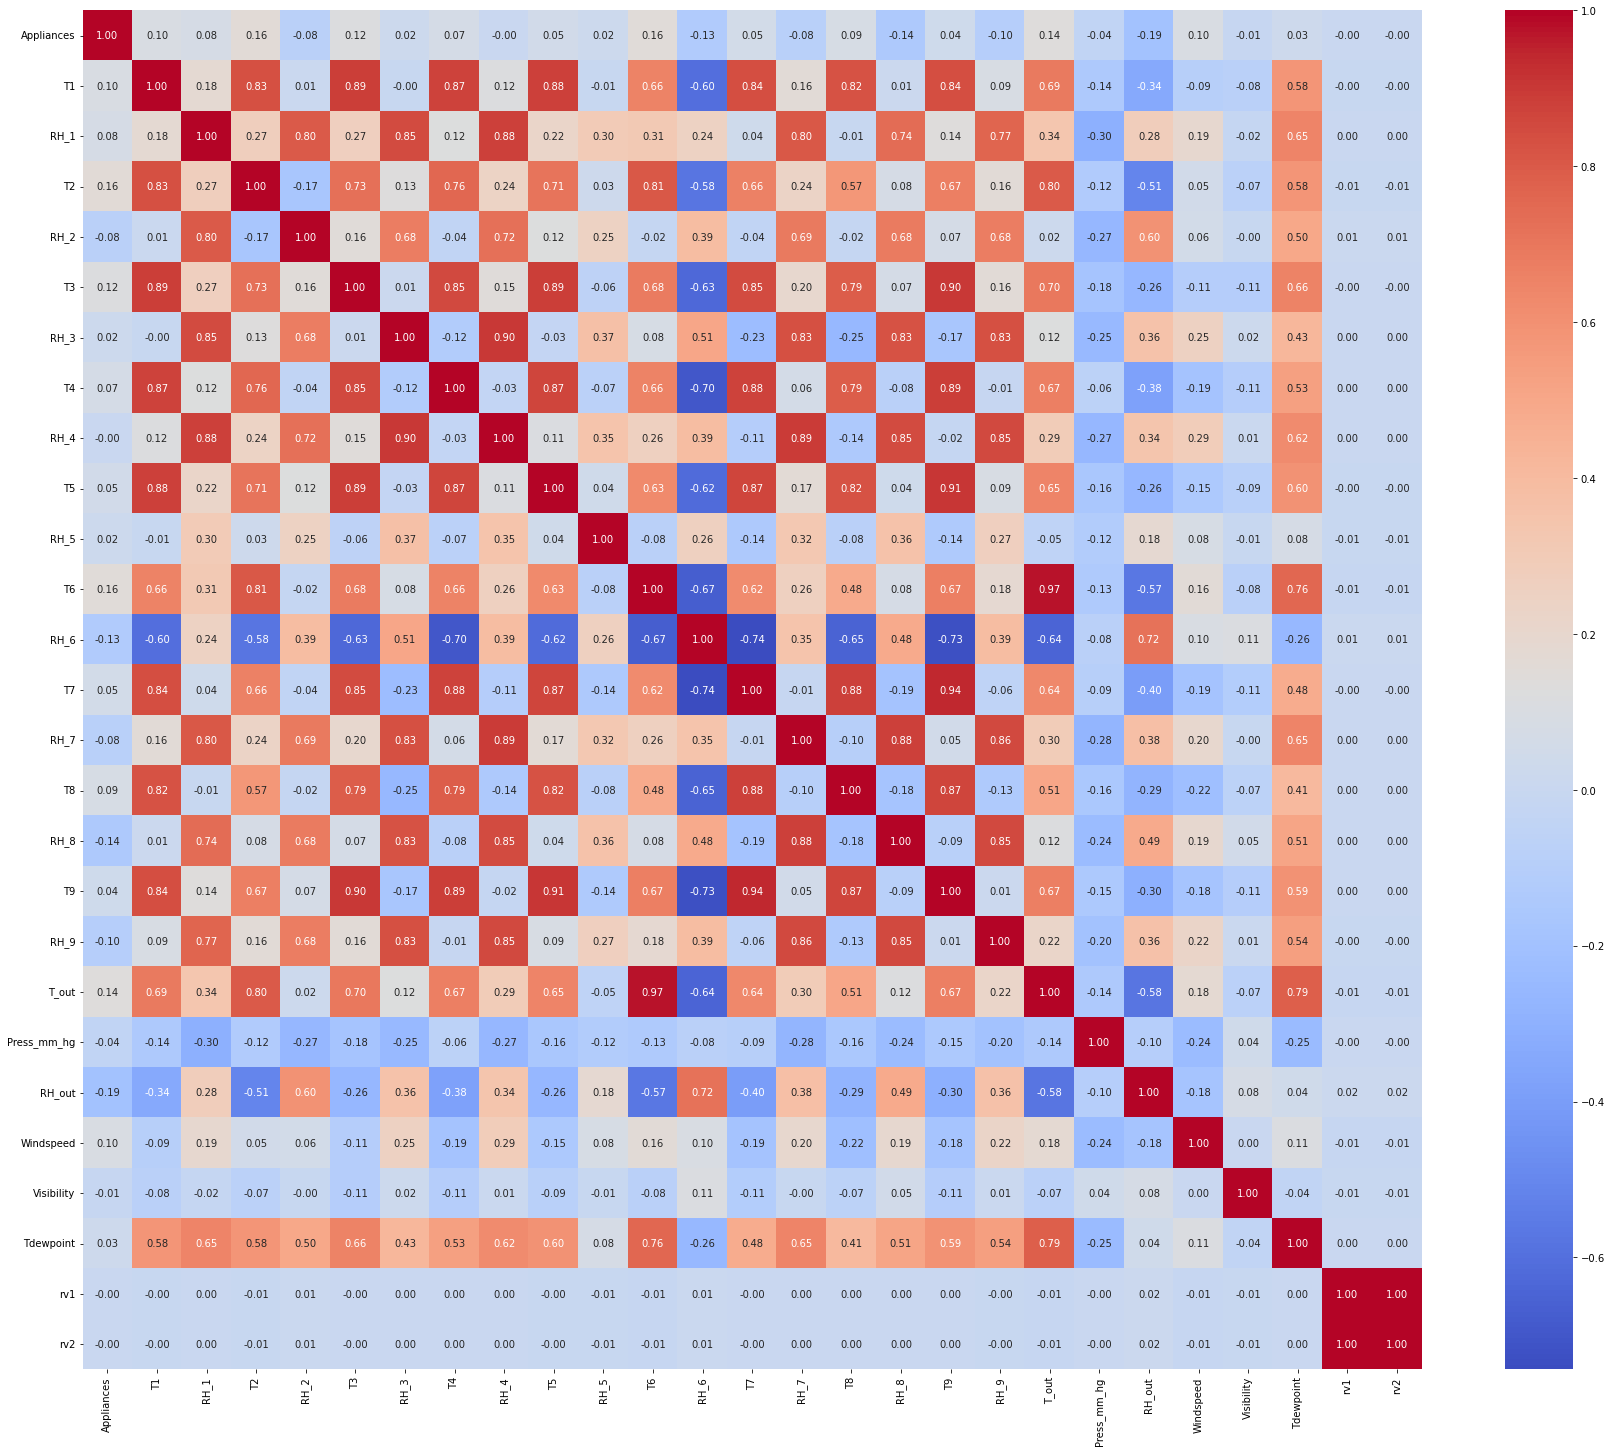

In [ ]:
#Drawing heat map to compare the correlation between features

#setting figure size
plt.figure(figsize = (30,25))

#Creating the data
corr = appliance_data.corr()

#creating heatmap
sns.heatmap(corr, cmap = 'coolwarm',annot = True, fmt = '.2f')
plt.show()

Inference:

1. All the temperature variables ranging from T1 to T9 and T_out have positive correlation with the target variable (Appliances) .

2. T3, T4, T5 and T7 have a high degree of correlation with T9. 

3. T6 & T_Out are highly correlated (both temperatures from outside).

4. RH_3 and RH_4 are highly correlated with each other.

4. Visibility, Windspeed and Press_mm_hg have low correlation values.

5. There are no significantly high correlation cases (> 0.9) for humidity sensors.

6. Visibility, rv1, rv2 and Press_mm_hg have low correlation with the target variable(Appliances).


According to my hypothesis:

1. RH_4, T6 and T9 can be removed from training set as information provided by them can be provided by other fields.

2. Random variables have no role to play in further analysis as they are having very low correlation values.




In [ ]:
#From the above heatmap inference, we decided to drop RH_4, T6, T9, Press_mm_hg, Visibility, rv1 and rv2.
appliance_data.drop(["RH_4", "T6", "T9", "Visibility", "rv1", "rv2", "Press_mm_hg"], 
                    axis = 1, inplace = True)
appliance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17659 entries, 0 to 19732
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Appliances  17659 non-null  int64  
 1   T1          17659 non-null  float64
 2   RH_1        17659 non-null  float64
 3   T2          17659 non-null  float64
 4   RH_2        17659 non-null  float64
 5   T3          17659 non-null  float64
 6   RH_3        17659 non-null  float64
 7   T4          17659 non-null  float64
 8   T5          17659 non-null  float64
 9   RH_5        17659 non-null  float64
 10  RH_6        17659 non-null  float64
 11  T7          17659 non-null  float64
 12  RH_7        17659 non-null  float64
 13  T8          17659 non-null  float64
 14  RH_8        17659 non-null  float64
 15  RH_9        17659 non-null  float64
 16  T_out       17659 non-null  float64
 17  RH_out      17659 non-null  float64
 18  Windspeed   17659 non-null  float64
 19  Tdewpoint   17659 non-nul

#**Data Preprocessing**

In [ ]:
#Creating the data of independent variables
X = appliance_data.drop('Appliances', axis = 1)

#Creating the data of dependent variables
y = appliance_data[['Appliances']]

In [ ]:
#Splitting the dataset into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Transforming the data
scaler = StandardScaler()

#Create dummy test and training set to hold scaled values
s_train = pd.DataFrame(columns = X_train.columns, index = X_train.index)
s_train[s_train.columns] = scaler.fit_transform(X_train)

s_test = pd.DataFrame(columns = X_test.columns, index = X_test.index)
s_test[s_test.columns] = scaler.transform(X_test)

#Assigning dummy datasets to original datasets
X_train = s_train
X_test = s_test

# **Model Implementation**

We will be looking at following Algorithms

1. **Linear Regression Model**

2. **Improved Linear Regression Models:**

    (i) Ridge Regression
    
    (ii) Lasso Regression


3. **Nearest Neighbour Regressor:**
    
    (i) KNeighbors Regressor

4. **Decision Tree Regressor**

5. **Ensemble Mdels:**

    (i) Random Forest Regressor

    (ii) Gradient Boosting Regressor

    (iii) ExtraTrees Regressor


In [ ]:
#Creating a list of diiferent models 
models = [
          ['Linear Regressor: ', LinearRegression()],
          ['Lasso: ', Lasso()],
          ['Ridge: ', Ridge()],
          ['KNeighbors Regressor: ', KNeighborsRegressor()],
          ['Decision Tree Regressor: ', DecisionTreeRegressor()],
          ['Random Forest: ', RandomForestRegressor()],
          ['Gradient Boosting Regressor: ', GradientBoostingRegressor()],
          ['Extra Trees Regressor: ', ExtraTreesRegressor()]
]

In [ ]:
#Creating function for calculating Adjusted R2 score of train and test dataset

def Adjusted_R2(model_instance, X, y):
    ''' Takes model instance and training or test set (dependent(X) and 
        independent(y) both) to return Adjusted R2 score of train dataset.
    '''
  
    r2 = model_instance.score(X, y)
    n = len(X)
    k = len(X.columns)
    adj_r2 = 1 - (((n - 1)/(n - k - 1)) * (1 - r2))
    return adj_r2


In [ ]:
#Run all the proposed models and update the information in a list model_data

#Creating model_data as an empty list
model_data = []
for name, n_model in models:
    n_model_data = {}

    #Using random_state to produce the same results across different executions
    n_model.random_state = 0
  
    #Adding names in n_model_data dictionay
    n_model_data["Name"] = name

    #Start time of model
    start = time.time()                                
  
    #Fitting the model
    n_model.fit(X_train, y_train)

    #End time of model
    end = time.time()
    n_model_data["Train Time"] = end - start

    #checking for metrics 
    n_model_data["Train R2 Score"] = r2_score(y_train, n_model.predict(X_train))
    n_model_data["Test R2 Score"] = r2_score(y_test, n_model.predict(X_test))
    n_model_data["Train Adjusted R2"] = Adjusted_R2(n_model, X_train, y_train)
    n_model_data["Test Adjusted R2"] = Adjusted_R2(n_model, X_test, y_test)
    n_model_data["Train MAE"] = mean_absolute_error(y_train, n_model.predict(X_train))
    n_model_data["Test MAE"] = mean_absolute_error(y_test, n_model.predict(X_test)) 
    n_model_data["Train RMSE Score"] = sqrt(mean_squared_error(y_train, n_model.predict(X_train)))
    n_model_data["Test RMSE Score"] = sqrt(mean_squared_error(y_test, n_model.predict(X_test)))

    #Appending all metrics into model_data list
    model_data.append(n_model_data)
  

In [ ]:
#Display the list of metrics in different models
model_data

[{'Name': 'Linear Regressor: ',
  'Test Adjusted R2': 0.18321456980688378,
  'Test MAE': 29.861798993526776,
  'Test R2 Score': 0.18760962026671646,
  'Test RMSE Score': 46.90634173484394,
  'Train Adjusted R2': 0.19682468609306236,
  'Train MAE': 30.090130026192675,
  'Train R2 Score': 0.1979049870249775,
  'Train RMSE Score': 47.040498323428935,
  'Train Time': 0.021584272384643555},
 {'Name': 'Lasso: ',
  'Test Adjusted R2': 0.15087821896463927,
  'Test MAE': 30.18813151893687,
  'Test R2 Score': 0.15544726848026424,
  'Test RMSE Score': 47.82583517489131,
  'Train Adjusted R2': 0.16386278444877034,
  'Train MAE': 30.416714960037616,
  'Train R2 Score': 0.16498742037511005,
  'Train RMSE Score': 47.99605196405167,
  'Train Time': 0.019550323486328125},
 {'Name': 'Ridge: ',
  'Test Adjusted R2': 0.18320110910212883,
  'Test MAE': 29.860601314036924,
  'Test R2 Score': 0.18759623199282816,
  'Test RMSE Score': 46.906728243829384,
  'Train Adjusted R2': 0.19682443279845374,
  'Train MA

In [ ]:
#Creating a dataframe from model_data to compare the performance of different models
model_data_df = pd.DataFrame(model_data)
model_data_df

,Name,Train Time,Train R2 Score,Test R2 Score,Train Adjusted R2,Test Adjusted R2,Train MAE,Test MAE,Train RMSE Score,Test RMSE Score
0,Linear Regressor:,0.021584,0.197905,0.187610,0.196825,0.183215,30.090130,29.861799,47.040498,46.906342
1,Lasso:,0.019550,0.164987,0.155447,0.163863,0.150878,30.416715,30.188132,47.996052,47.825835
2,Ridge:,0.006754,0.197905,0.187596,0.196824,0.183201,30.088641,29.860601,47.040506,46.906728
3,KNeighbors Regressor:,0.003401,0.717213,0.552062,0.716832,0.549639,14.488002,18.093998,27.931131,34.830377
4,Decision Tree Regressor:,0.605137,1.000000,0.286622,1.000000,0.282762,0.000000,21.155153,0.000000,43.955089
5,Random Forest:,28.242664,0.942368,0.599894,0.942290,0.597729,6.632859,17.152520,12.609291,32.918259
6,Gradient Boosting Regressor:,6.073318,0.366799,0.297778,0.365946,0.293979,25.699464,26.645732,41.795523,43.610037
7,Extra Trees Regressor:,6.335960,1.000000,0.628284,1.000000,0.626273,0.000354,16.254898,0.009216,31.728870


Inference:
1. KNeighbors regressor is taking the least training time.

2. Random forest regressor is taking maximum training time but performing well on the dataset.

3. The decision tree regressor has zero training error indicating overfitting and performed poorly on the test set.

4. Lasso, ridge, linear, and gradient boosting regressors are performing poorly on both train and test sets.

5. Extra trees regressor has the lowest test error.



**Selected model:**
1. KNeighbors Regressor
2. Random Forest Regressor
3. Extra Trees Regressor

In [ ]:
#Creating the dataframe to store the performance of selected models
compiled = pd.DataFrame(columns = ["Regressor", 
                                   "Train R2 Score", "Test R2 Score", 
                                   "Train Adjusted R2", "Test Adjusted R2", 
                                   "Train MAE", "Test MAE", 
                                   "Train RMSE Score", "Test RMSE Score"])

# **1. KNeighbors Regressor**

### **Tuning for n_neighbors**

In [ ]:
#Setup list to store train and test accuracy
neighbors = range(1,21)
train_accuracy = list(range(len(neighbors)))
test_accuracy = list(range(len(neighbors)))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn_ = KNeighborsRegressor(n_neighbors = k)
    
    #Fit the model
    knn_.fit(X_train, y_train)
    
    #Computing accuracy on the training set
    train_accuracy[i] = knn_.score(X_train, y_train)
    
    #Computing accuracy on the test set
    test_accuracy[i] = knn_.score(X_test, y_test) 

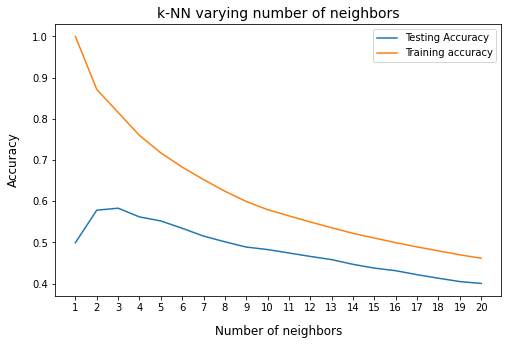

In [ ]:
#Generate plot for train and test accuracy
fig = plt.figure(figsize=(8,5)) 

#Creating line chart
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()

#To display x label, y label and the title of the line chart
plt.xlabel('Number of neighbors', fontsize = 12, labelpad = 12)
plt.xticks(ticks = list(range(1,21)))
plt.ylabel('Accuracy', fontsize = 12, labelpad = 12)
plt.title('k-NN varying number of neighbors', fontsize = 14)
plt.show()

Inference:

From the above line chart, it is observed that test accuracy is highest at k = 3 in the range of 1 to 20.

In [ ]:
#Setup a knn regressor with selected (k = 3) neighbors
knn_k = KNeighborsRegressor(n_neighbors = 3)
knn_k.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
#R2 score on training and test set with k = 3
print(f" R2 score on training set with k = 3 is {knn_k.score(X_train, y_train)}",
      f"\n R2 score on test set with k = 3 is {knn_k.score(X_test, y_test)}")

 R2 score on training set with k = 3 is 0.8154623112977205 
 R2 score on test set with k = 3 is 0.5830297550286867


In [ ]:
#Adjusted R2 score on training and test set with k = 3
print(f" Adjusted R2 score on training set with k = 3 is {Adjusted_R2(knn_k, X_train, y_train)}",
      f"\n Adjusted R2 score on test set with k = 3 is {Adjusted_R2(knn_k, X_test, y_test)}")

 Adjusted R2 score on training set with k = 3 is 0.8152137668810945 
 Adjusted R2 score on test set with k = 3 is 0.5807739365052087


In [ ]:
#MAE score on train and test set with k = 3
print(f" Mean absolute error on train set with k = 3 is {mean_absolute_error(y_train,  knn_k.predict(X_train))}",
      f"\n Mean absolute error on test set with k = 3 is {mean_absolute_error(y_test,  knn_k.predict(X_test))}")

 Mean absolute error on train set with k = 3 is 11.175526769071046 
 Mean absolute error on test set with k = 3 is 16.794073235183088


In [ ]:
#RMSE score on train and test set with k = 3
print(f" RMSE score on train set with k = 3 is {np.sqrt(mean_squared_error(y_train, knn_k.predict(X_train)))}",
      f"\n RMSE score on test set with k = 3 is {np.sqrt(mean_squared_error(y_test, knn_k.predict(X_test)))}")

 RMSE score on train set with k = 3 is 22.563244220973463 
 RMSE score on test set with k = 3 is 33.604830541331246


### **Hyperparameter finetuning using GridSearchCV**

In [ ]:
knn = KNeighborsRegressor()

#Parameters Grid
param_grid_knn = {'n_neighbors' : range(1,10),
                  'weights' : ['uniform', 'distance'],
                  'p' : [1, 2],  
                  'leaf_size' : [10, 20, 30, 40, 50, 60]} 

#Instantiate the grid search model             
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 5, n_jobs = -1)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [10, 20, 30, 40, 50, 60],
                         'n_neighbors': range(1, 10), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [ ]:
#Tuned parameter set for KNeighbors Regressor
print("Tuned parameter set: ", knn_cv.best_params_)

Tuned parameter set:  {'leaf_size': 10, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [ ]:
#Best estimator for KNeighbors Regressor
print("Best estimator for KNeighbors Regressor is: ", knn_cv.best_estimator_)

Best estimator for KNeighbors Regressor is:  KNeighborsRegressor(leaf_size=10, n_neighbors=4, p=1, weights='distance')


In [ ]:
#R2 score on training and test set with tuned parameters
print(f" R2 score on training set with tuned parameters is {knn_cv.best_estimator_.score(X_train, y_train)}",
      f"\n R2 score on test set with tuned parameters is {knn_cv.best_estimator_.score(X_test, y_test)}")

 R2 score on training set with tuned parameters is 1.0 
 R2 score on test set with tuned parameters is 0.6143683021148226


In [ ]:
#Adjusted R2 score on training and test set with tuned parameters
print(f" Adjusted R2 score on training set with tuned parameters is {Adjusted_R2(knn_cv.best_estimator_, X_train, y_train)}",
      f"\n Adjusted R2 score on test set with tuned parameters is {Adjusted_R2(knn_cv.best_estimator_, X_test, y_test)}")

 Adjusted R2 score on training set with tuned parameters is 1.0 
 Adjusted R2 score on test set with tuned parameters is 0.6122820258449426


In [ ]:
#MAE score on train and test set with tuned parameters
print(f" Mean absolute error on train set with tuned parameters is {mean_absolute_error(y_train,  knn_cv.best_estimator_.predict(X_train))}",
      f"\n Mean absolute error on test set with tuned parameters is {mean_absolute_error(y_test,  knn_cv.best_estimator_.predict(X_test))}")

 Mean absolute error on train set with tuned parameters is 0.0 
 Mean absolute error on test set with tuned parameters is 16.32326810739263


In [ ]:
#RMSE score on train and test set with tuned parameters
print(f" RMSE score on train set with tuned parameters is {np.sqrt(mean_squared_error(y_train, knn_cv.best_estimator_.predict(X_train)))}",
      f"\n RMSE score on test set with tuned parameters is {np.sqrt(mean_squared_error(y_test, knn_cv.best_estimator_.predict(X_test)))}")

 RMSE score on train set with tuned parameters is 0.0 
 RMSE score on test set with tuned parameters is 32.31733495964479


In [ ]:
#Appending the best hyperparameter and scores with tuned parameters in the compiled df
compiled = compiled.append({"Regressor" : "KNeighbors Regressor", 
                            "Train R2 Score" : knn_cv.best_estimator_.score(X_train, y_train), 
                            "Test R2 Score" : knn_cv.best_estimator_.score(X_test, y_test), 
                            "Train Adjusted R2" : Adjusted_R2(knn_cv.best_estimator_, X_train, y_train), 
                            "Test Adjusted R2" : Adjusted_R2(knn_cv.best_estimator_, X_test, y_test), 
                            "Train MAE" : mean_absolute_error(y_train,  knn_cv.best_estimator_.predict(X_train)), 
                            "Test MAE" : mean_absolute_error(y_test,  knn_cv.best_estimator_.predict(X_test)), 
                            "Train RMSE Score" : np.sqrt(mean_squared_error(y_train, knn_cv.best_estimator_.predict(X_train))), 
                            "Test RMSE Score" : np.sqrt(mean_squared_error(y_test, knn_cv.best_estimator_.predict(X_test))),
                            "Best Hyperparameters" : knn_cv.best_params_ 
                            }, ignore_index = True)

Inference:
1. Best tuned parameter are leaf_size = 10, n_neighbors = 4, p = 1 (i.e. metric is 'manhattan'), and weights = 'distance'.
2. Training set R2 score of 1.0 indicates overfitting on training set.
3. Improved test accuracy: 
   *  The test set R2 score is 0.614 over 0.552, which was achieved using the untuned model.
   *  The test set Adjusted R2 score is 0.612 over 0.549, which was achieved using the untuned model.


4. Improved test error: 
   *  The test set MAE score is 16.32 over 18.09, which was achieved using the untuned model.
   *  The test set RMSE score is 32.31 over 34.83, which was achieved using the untuned model.